# Introduction to Time-Series Data

Time-series data is a sequence of data points collected or recorded at time-ordered intervals. Examples include daily stock prices, monthly sales data, or yearly temperature readings. Analyzing time-series data enables us to understand underlying patterns such as trends, seasonality, and cyclical fluctuations. 

Note the difference between time-series data and cross-sectional data below. So far we have been dealing with cross-sectional data.

![time-series-cross-sectional](../assets/cross_sectional_time_series.png)

## Trend, Season, Cycle

![antidiabetic_drug](../assets/antidiabetic_drug_sales.png)

There are 3 components of time-series data:

- Trend

A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. There is a trend in the antidiabetic drug sales data shown.

- Seasonal

A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period. The monthly sales of antidiabetic drugs shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

- Cyclic

A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.

> Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitudes of cycles tend to be more variable than the magnitudes of seasonal patterns.

Many time series include trend, cycles and seasonality. When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.

### Examples

![four_examples](../assets/four_examples.png)

1. The monthly housing sales (top left) show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.
2. The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.
3. The Australian quarterly electricity production (bottom left) shows a strong increasing trend, with strong seasonality. There is no evidence of any cyclic behaviour here.
4. The daily change in the Google closing stock price (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a forecasting model.

# Visualizing Time-Series Data

Visualizing time-series data is a critical step in the analysis process. It helps in understanding underlying patterns, trends, seasonality, and the presence of noise.

## Time Series Plots

A time series plot is a graph where some measure of time is the unit on the x-axis, and the variable or variables in which we are interested are plotted on the y-axis.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sktime.datasets import load_airline

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
data = load_airline()

In [103]:
data

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

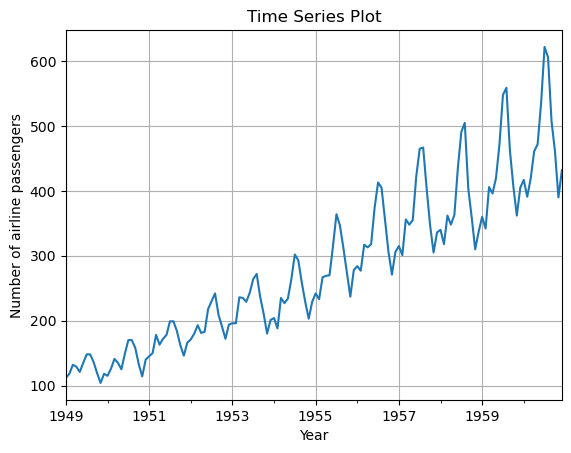

In [104]:
data.plot()
plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel(data.name)
plt.grid(True)
plt.show()

## Seasonal Plots

Seasonal plots are used to assess the presence and type of seasonality in a time series.

In [105]:
years = data.index.year.unique()

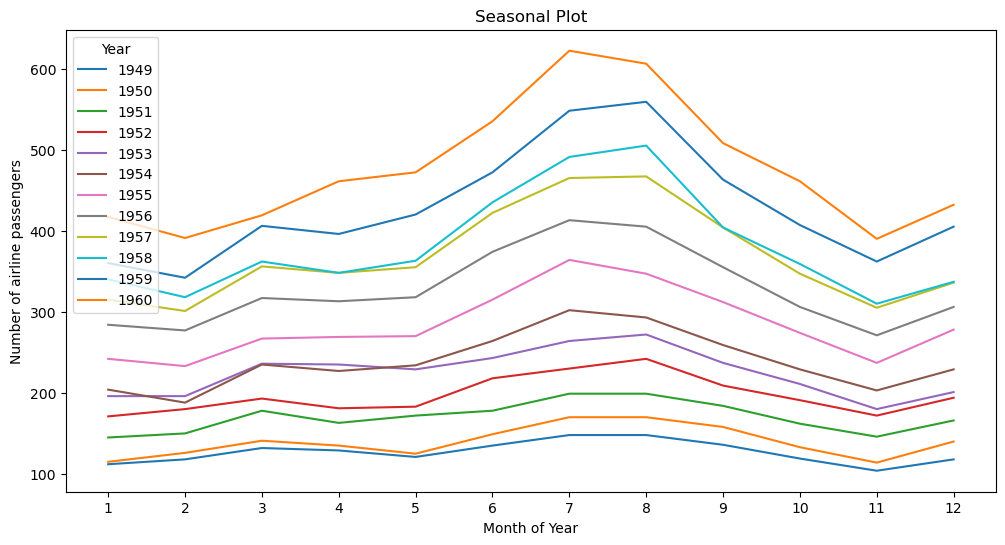

In [106]:
plt.figure(figsize=(12, 6))

for year in years:
    plt.plot(data[data.index.year == year].index.month, data[data.index.year == year], label=year)

plt.title('Seasonal Plot')
plt.xlabel('Month of Year')
plt.xticks(range(1, 13))
plt.ylabel(data.name)
plt.legend(title='Year')
plt.show()

## Subseries Plots

Subseries plots (or seasonal subseries plots) can be useful to compare seasonal patterns across different years.

In [107]:
import seaborn as sns

In [108]:
dates = data.index.astype('datetime64')
data_df = data.reset_index(name='value')
data_df['month'] = dates.strftime('%b')
data_df['year'] = dates.year.astype(int)

In [109]:
data_df

,Period,value,month,year
0,1949-01,112.0,Jan,1949
1,1949-02,118.0,Feb,1949
2,1949-03,132.0,Mar,1949
3,1949-04,129.0,Apr,1949
4,1949-05,121.0,May,1949
...,...,...,...,...
139,1960-08,606.0,Aug,1960
140,1960-09,508.0,Sep,1960
141,1960-10,461.0,Oct,1960
142,1960-11,390.0,Nov,1960


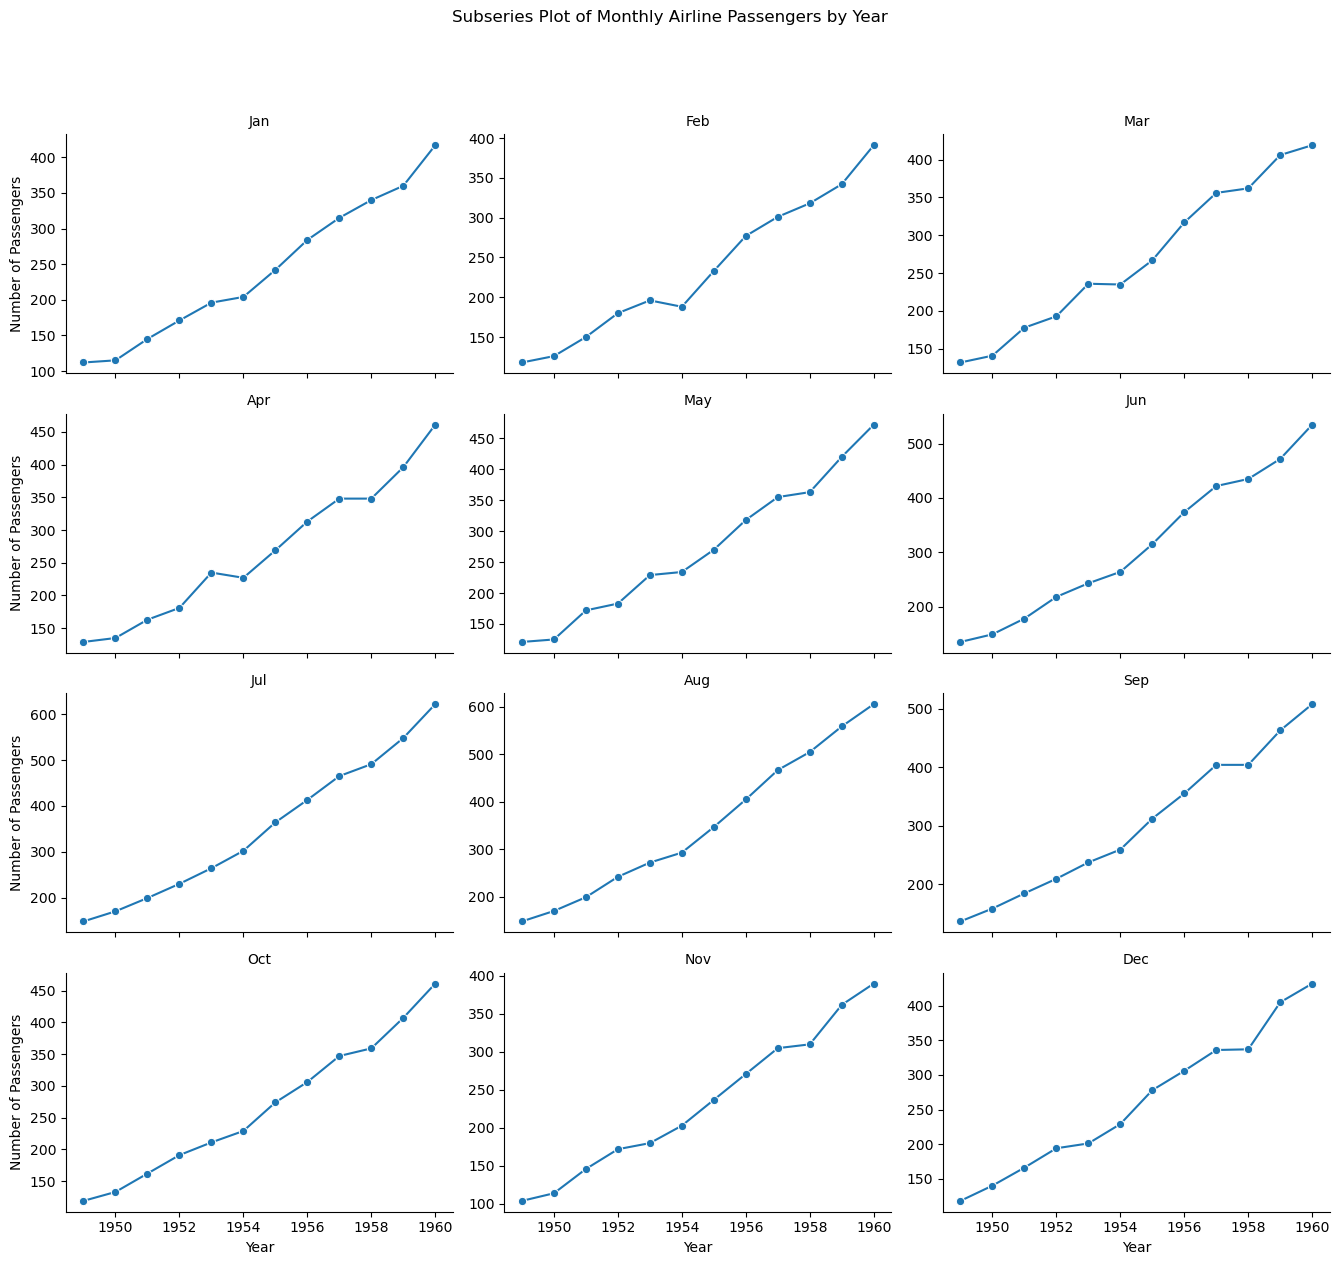

In [110]:
g = sns.FacetGrid(data_df, col="month", col_wrap=3, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, "year", "value", marker='o')
g.set_axis_labels('Year', 'Number of Passengers')
g.set_titles("{col_name}")
g.fig.suptitle('Subseries Plot of Monthly Airline Passengers by Year', y=1.05)
g.tight_layout()

## Lag Plots

Lag plots are used to check for autocorrelation in a time series. If the data are random, the lag plot will exhibit no identifiable pattern.

In [111]:
from pandas.plotting import lag_plot

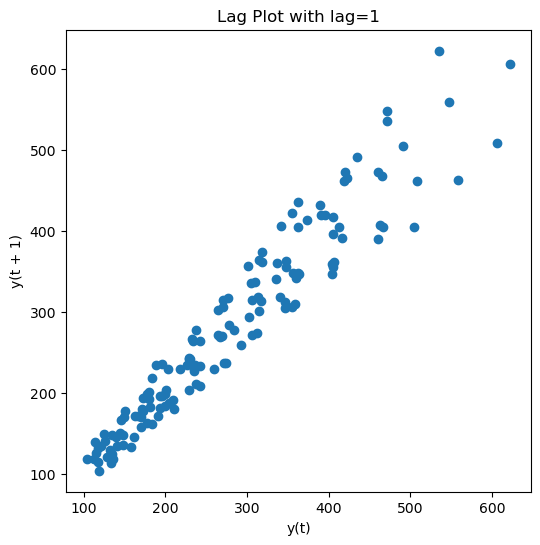

In [114]:
plt.figure(figsize=(6, 6))
lag_plot(data, lag=1)
plt.title('Lag Plot with lag=1')
plt.show()

## Autocorrelation

Autocorrelation, also known as serial correlation, is a statistical measure that quantifies the degree of similarity between a time series and a lagged version of itself over successive time intervals. It's a tool commonly used in time-series analysis to help understand the internal structure of the data.

Autocorrelation measures the relationship between a variable's current value and its past values. It is an important feature of time-series data, which often depends on previous time points. For instance, today's stock market price is likely to be similar to yesterday's price because economic factors change gradually over time.

Positive autocorrelation occurs when an increase in a time series leads to a proportional increase in a lagged version of itself. Negative autocorrelation is when an increase leads to a proportional decrease. If there is no autocorrelation, the time series does not have any linear relationship with its lagged versions.

### Autocorrelation Function (ACF)

The autocorrelation function (ACF) is a function that represents autocorrelation of a time series as a function of the time lag. It gives us values of autocorrelation at different lags, which can be plotted to show the autocorrelation structure of the data.

The ACF at lag $ k $ is calculated as:

$$ ACF(k) = \frac{\sum_{t=k+1}^{T}(y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T}(y_t - \bar{y})^2} $$

where:
- $ y_t $ is the value of the time series at time $ t $
- $ \bar{y} $ is the mean of the time series
- $ T $ is the total number of observations

The ACF value ranges between -1 and 1. A value close to 1 indicates strong positive autocorrelation, while a value close to -1 indicates strong negative autocorrelation. A value near 0 suggests that there is no autocorrelation.

## Autocorrelation (ACF) Plots

To visualize the ACF, you can plot it against the lag values. This plot is known as a correlogram or ACF plot.

In [94]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [120]:
autocorrelations = acf(data, nlags=60)
print(f'Autocorrelations: {autocorrelations}')

Autocorrelations: [ 1.00000000e+00  9.48047341e-01  8.75574835e-01  8.06681155e-01
  7.52625417e-01  7.13769973e-01  6.81733603e-01  6.62904386e-01
  6.55610484e-01  6.70948328e-01  7.02719921e-01  7.43240189e-01
  7.60395042e-01  7.12660870e-01  6.46342279e-01  5.85923424e-01
  5.37955191e-01  4.99747526e-01  4.68734013e-01  4.49870665e-01
  4.41628796e-01  4.57223757e-01  4.82482030e-01  5.17126988e-01
  5.32189830e-01  4.93975694e-01  4.37721337e-01  3.87602900e-01
  3.48025032e-01  3.14983879e-01  2.88496819e-01  2.70801867e-01
  2.64290106e-01  2.76799337e-01  2.98521495e-01  3.25587117e-01
  3.37023599e-01  3.03334859e-01  2.53977081e-01  2.10655338e-01
  1.72170924e-01  1.38400407e-01  1.11403241e-01  9.09845262e-02
  8.21717704e-02  8.87722191e-02  1.03869577e-01  1.23930824e-01
  1.32634564e-01  1.03747230e-01  6.20980459e-02  2.88065036e-02
 -8.10514322e-04 -2.79620172e-02 -5.27862768e-02 -7.08251500e-02
 -7.96632163e-02 -7.48314809e-02 -6.37270762e-02 -5.13856725e-02
 -4.693


`lags=20` sets the number of lags to 20, and `alpha=0.05` sets the confidence intervals to 95%. The shaded area in the plot indicates the confidence interval; autocorrelation values outside this area are statistically significant.

<Figure size 1200x600 with 0 Axes>

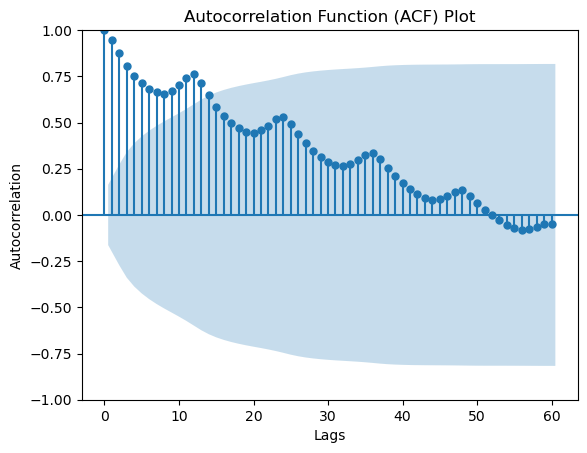

In [121]:
plt.figure(figsize=(12, 6))
plot_acf(data, lags=60, alpha=0.05)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

## White Noise

White noise is a random signal having equal intensity at different frequencies, giving it a constant power spectral density. In time series, white noise is a sequence of random data where every value has a time-independent mean and variance, and zero autocorrelation at all lags.

### Identifying White Noise

You can identify white noise in a time series by checking the following conditions:

- The mean of the series should not be significantly different from zero.
- The variance should not change over time.
- The autocorrelation at all lags should be near zero.

In [122]:
print(f'Mean: {data.mean()}')
print(f'Variance: {data.var()}')

Mean: 280.2986111111111
Variance: 14391.9172008547


# Time Series Decomposition

Time series decomposition is a technique that splits a time series into several components, each representing an underlying pattern. By decomposing a time series, we can identify and measure the different factors that influence the data, such as trends, seasonality, and irregular fluctuations.

The main components of time series decomposition are:

- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Residuals**: The random variation in the series.

## Types of Decomposition

There are two primary types of decomposition methods:

1. **Additive Decomposition**: Assumes that the components add together to make the time series.
   
   $$ Y_t = T_t + S_t + R_t $$

2. **Multiplicative Decomposition**: Assumes that the components multiply together to make the time series.
   
   $$ Y_t = T_t \times S_t \times R_t $$

The choice between additive and multiplicative decomposition depends on the nature of the seasonal variation. If the seasonal variation is roughly constant throughout the series, an additive model is appropriate. If the seasonal variation increases over time, a multiplicative model is more suitable.

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
data.index = dates

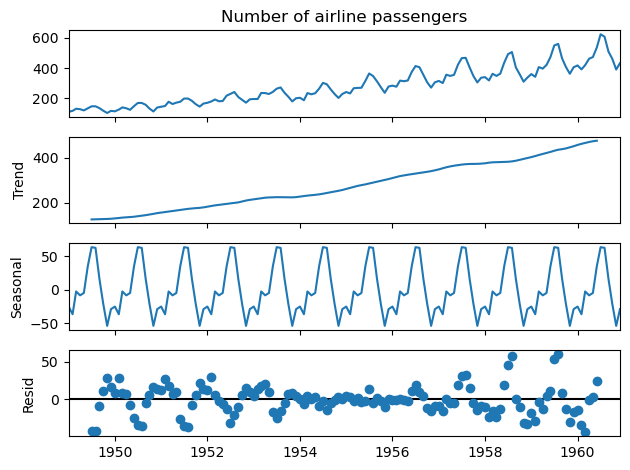

In [147]:
# Perform additive decomposition
decomposition = seasonal_decompose(data, model='additive')

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

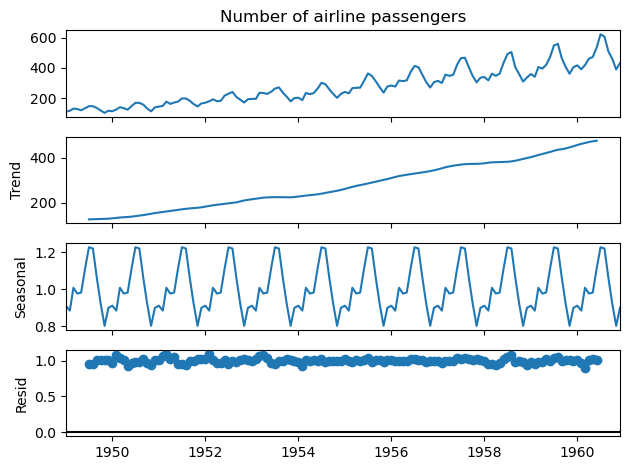

In [148]:
# Perform multiplicative decomposition
decomposition = seasonal_decompose(data, model='multiplicative')

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

## Interpreting Decomposition Results

After decomposing the time series, you can analyze each component separately:

- **Trend**: Look for any long-term upward or downward movement in the data. Smoothing techniques like moving averages can help identify the trend.
- **Seasonality**: Identify any regular pattern that repeats over a fixed period, such as days, months, or quarters.
- **Residuals**: Examine the leftover or error component after removing the trend and seasonality. Ideally, the residuals should be random and have a mean close to zero.

# Time-Series Forecasting / Modelling Evaluation

In time series analysis, the order of observations is crucial. Unlike random train-test splits used in cross-sectional data, time series data requires careful handling to preserve the temporal order during model training and evaluation. Temporal train-test split and time series cross-validation are techniques designed to respect the time order of observations.

![temporal_split](../assets/temporal_split.png)

## Temporal Train-Test Split

Temporal train-test split is a method where the dataset is divided into training and test sets based on time. The training set consists of initial observations, and the test set consists of subsequent observations.

### Why Use Temporal Train-Test Split?

- To prevent future information from leaking into the model training process.
- To evaluate the model's performance on unseen future data.

## Time Series Cross-Validation

Time series cross-validation is a resampling technique used to evaluate time series models. It involves multiple train-test splits, each time with a different test set.

### Types of Time Series Cross-Validation

- **Sliding Window**: The training set slides forward in time, expanding to include the next observation.
- **Expanding Window**: The training set expands to include all available data up to the next test set.

### Advantages of Time Series Cross-Validation

- Provides a more robust estimate of the model's performance.
- Utilizes more data for training, which can be beneficial for small datasets.

### Challenges of Time Series Cross-Validation

- Computationally expensive due to multiple train-test splits.
- Choosing the correct window size and forecasting horizon can be challenging.

# Evaluation Metrics

1. **Mean Absolute Error (MAE)**:
   - Explanation: The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
     $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

2. **Mean Squared Error (MSE)**:
   - Explanation: The MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is more sensitive to outliers than MAE because it squares the errors.
     $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

3. **Root Mean Squared Error (RMSE)**:
   - Explanation: The RMSE is the square root of the MSE and serves to scale the error to the same units as the forecasted variable. It gives a relatively high weight to large errors.
     $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

4. **Mean Absolute Percentage Error (MAPE)**:
   - Explanation: The MAPE measures the size of the error in percentage terms. It is calculated as the average of the absolute percentage errors of the forecasts.
     $$ \text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $$

5. **Symmetric Mean Absolute Percentage Error (sMAPE)**:
   - Explanation: The sMAPE is a variation of the MAPE that addresses some of its limitations, such as being undefined when $ y_i $ is zero. The sMAPE is symmetric because it equally penalizes positive and negative forecast errors.
     $$ \text{sMAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2} $$

# Naive Forecasting

Naive forecasting methods are simple yet surprisingly effective for making predictions in time series analysis. They are based on the assumption that the most recent observations are the best predictors of the future. These methods serve as a good starting point and baseline for comparing more complex models.

## What is Naive Forecasting?

Naive forecasting uses the value from the last period as the prediction for the next period. It is called "naive" because it assumes the simplest form of prediction without accounting for trends, seasonality, or other patterns in the data.

## The Naive Forecasting Model

The naive forecasting model can be mathematically represented as:

$$ \hat{y}_{t+1} = y_t $$

where:
- $ \hat{y}_{t+1} $ is the predicted value for the next period
- $ y_t $ is the observed value at time $ t $

## Variations of Naive Forecasting

### Seasonal Naive Forecasting

The seasonal naive method takes the last observation from the same season of the previous cycle as the forecast. This is useful when the data exhibits strong seasonality.

The seasonal naive forecast can be expressed as:

$$ \hat{y}_{t+1} = y_{t+1-m} $$

where:
- $ m $ is the seasonal period length

### Drift Method

The drift method allows the forecasts to change over time at the average rate of change seen in the historical data. It is represented as:

$$ \hat{y}_{t+h} = y_t + h \left( \frac{y_t - y_1}{t-1} \right) $$

where:
- $ h $ is the forecast horizon
- $ y_1 $ is the first observed value

In [186]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [174]:
y = load_airline()

In [175]:
# split the airline passengers data into train and test
# the last 3 years will be the test set, and the prior years are the training set
y_train, y_test = temporal_train_test_split(y, test_size=36)

In [176]:
y_test

Period
1958-01    340.0
1958-02    318.0
1958-03    362.0
1958-04    348.0
1958-05    363.0
1958-06    435.0
1958-07    491.0
1958-08    505.0
1958-09    404.0
1958-10    359.0
1958-11    310.0
1958-12    337.0
1959-01    360.0
1959-02    342.0
1959-03    406.0
1959-04    396.0
1959-05    420.0
1959-06    472.0
1959-07    548.0
1959-08    559.0
1959-09    463.0
1959-10    407.0
1959-11    362.0
1959-12    405.0
1960-01    417.0
1960-02    391.0
1960-03    419.0
1960-04    461.0
1960-05    472.0
1960-06    535.0
1960-07    622.0
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [177]:
y_train.shape

(108,)

In [188]:
# Initialize the naive forecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

NaiveForecaster()

In [189]:
# Define the forecasting horizon
fh = np.arange(1, len(y_test) + 1)

In [190]:
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

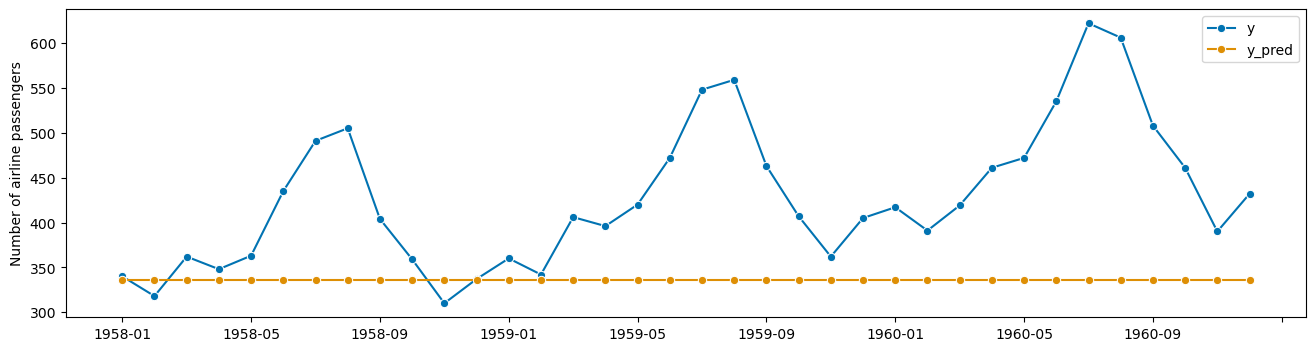

In [191]:
# plotting predictions and past data
plot_series(y_test, y_pred, labels=["y", "y_pred"])

In [192]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=True)

0.23195770387951434

In [193]:
# Initialize the seasonal naive forecaster
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)

NaiveForecaster(sp=12)

In [194]:
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

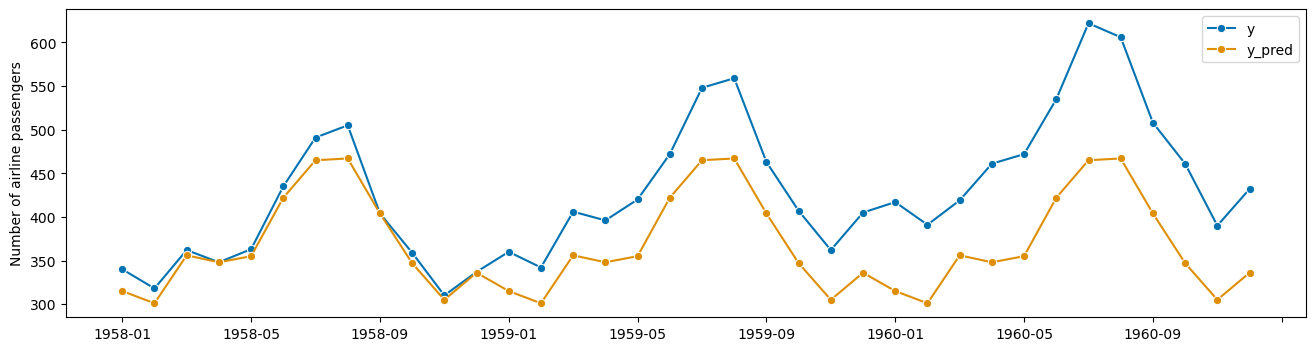

In [195]:
# plotting predictions and past data
plot_series(y_test, y_pred, labels=["y", "y_pred"])

In [196]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=True)

0.145427686270316

In [201]:
# Initialize the drift forecaster
forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(y_train)

NaiveForecaster(strategy='drift')

In [202]:
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

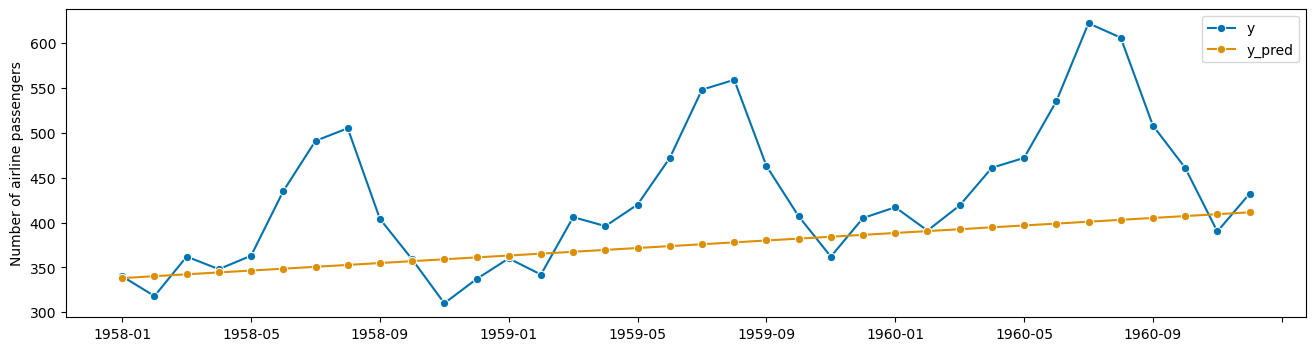

In [203]:
# plotting predictions and past data
plot_series(y_test, y_pred, labels=["y", "y_pred"])

In [204]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=True)

0.14474716829798706

# ARIMA

## Stationarity

Stationarity is a fundamental concept in time series analysis. A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation are constant (invariant) over time. In other words, it maintains a consistent structure over time, which makes it easier to model and predict.

### Types of Stationarity

- **Strict Stationarity**: All statistical properties of the time series are invariant to time shifts.
- **Weak Stationarity**: Only the first two moments (mean and variance) and the autocovariance function do not change over time.

### Testing for Stationarity

Common tests for stationarity include the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. These tests assess whether a time series has a unit root, a characteristic of a non-stationary series.

## Differencing

Differencing is a method used to transform a non-stationary time series into a stationary one. This is done by subtracting the previous observation from the current observation.

### First Differencing

The first difference of a time series is the series of changes from one period to the next. It can be expressed as:

$$ \Delta y_t = y_t - y_{t-1} $$

where:
- $ \Delta $ is the difference operator,
- $ y_t $ is the value at time $ t $,
- $ y_{t-1} $ is the value at time $ t-1 $.

If the time series is still not stationary after the first differencing, higher-order differencing might be necessary.

### Second Differencing

The second difference is the difference of the first difference:

$$ \Delta^2 y_t = \Delta(\Delta y_t) = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2} $$

### Seasonal Differencing

For seasonal data, a seasonal difference might be more appropriate:

$$ \Delta_m y_t = y_t - y_{t-m} $$

where:
- $ m $ is the number of periods in a season.

Differencing is a crucial step in the ARIMA modeling process, as ARIMA models require stationarity. The "I" in ARIMA stands for "Integrated," which refers to the differencing process that integrates the non-stationary series to make it stationary.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a widely used statistical method for time series forecasting that captures various standard temporal structures in time series data.

### Description

An ARIMA model is characterized by three primary parameters: $p$, $d$, and $q$:

- $p$: The number of autoregressive terms (AR part). It refers to the number of lags of the dependent variable to be used as predictors.
- $d$: The number of nonseasonal differences needed for stationarity (I part, for integrated). It represents the order of differencing to de-trend the time series.
- $q$: The number of lagged forecast errors in the prediction equation (MA part, for moving average). It implies using the error terms from previous time steps as predictors.

### ARIMA Model Formulation

The mathematical representation of an ARIMA model is:

$$ (1 - \sum_{i=1}^{p} \phi_i B^i)(1 - B)^d y_t = (1 + \sum_{i=1}^{q} \theta_i B^i) \epsilon_t $$

where:

- $ y_t $: The time series at time $ t $
- $ \phi_i $: The parameters of the autoregressive part of the model
- $ \theta_i $: The parameters of the moving average part
- $ B $: The backshift operator, where $ B^i y_t = y_{t-i} $
- $ \epsilon_t $: The error term (white noise) at time $ t $

## SARIMA (Seasonal Autoregressive Integrated Moving Average)

SARIMA is an extension of the ARIMA model that includes the ability to model seasonal effects. It is widely used for time series forecasting in data that exhibit non-stationarity due to both trend and seasonality.

### Description

A SARIMA model is defined by seven parameters: $p, d, q$ for the non-seasonal part, and $P, D, Q, m$ for the seasonal part:

- $p$: The number of autoregressive terms (AR part).
- $d$: The degree of differencing (I part, for integrated).
- $q$: The number of moving average terms (MA part).
- $P$: The number of seasonal autoregressive terms.
- $D$: The degree of seasonal differencing.
- $Q$: The number of seasonal moving average terms.
- $m$: The number of periods in a season.

### SARIMA Model Formulation

The mathematical representation of a SARIMA model is:

$$ (1 - \sum_{i=1}^{p} \phi_i B^i)(1 - \sum_{i=1}^{P} \Phi_i B^{mi})(1 - B)^d(1 - B^m)^D y_t = (1 + \sum_{i=1}^{q} \theta_i B^i)(1 + \sum_{i=1}^{Q} \Theta_i B^{mi}) \epsilon_t $$

where:

- $ y_t $: The time series at time $ t $,
- $ \phi_i $: The parameters of the non-seasonal AR part,
- $ \Phi_i $: The parameters of the seasonal AR part,
- $ \theta_i $: The parameters of the non-seasonal MA part,
- $ \Theta_i $: The parameters of the seasonal MA part,
- $ B $: The backshift operator, $ B^i y_t = y_{t-i} $,
- $ \epsilon_t $: The error term (white noise) at time $ t $.

### Seasonal Differencing

Seasonal differencing is a key step in making a time series stationary on seasonal terms. It involves computing the difference between an observation and its counterpart in the previous cycle:

$$ \nabla^D y_t = (1 - B^m)^D y_t $$

where $ \nabla^D $ is the seasonal difference operator of order $ D $ and $ m $ is the seasonal period.

### Non-Seasonal Differencing

Non-seasonal differencing is used to stabilize the mean of the time series and is given by:

$$ \Delta^d y_t = (1 - B)^d y_t $$

where $ \Delta^d $ is the difference operator of order $ d $.

### Combining Differencing

The combined differencing for SARIMA is then:

$$ \Delta^d \nabla^D y_t = (1 - B)^d(1 - B^m)^D y_t $$

This differencing ensures that the time series is stationary both in terms of the trend and seasonality, preparing it for the application of ARIMA modeling techniques.

## AutoARIMA

AutoARIMA stands for "Automatic ARIMA" and is used to automate the process of ARIMA model selection by searching over various combinations of $p$, $d$, and $q$ values to find the best fitting model.

### Description

AutoARIMA simplifies the model-building process by conducting a search over specified parameter ranges and selecting the best model based on a given criterion, typically the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC).

### AutoARIMA Process

AutoARIMA typically involves the following steps:

1. **Differencing**: Test the stationarity of the data and determine the order of differencing ($d$) required.
2. **Model Search**: Explore different combinations of $p$ and $q$ within specified ranges.
3. **Model Selection**: Choose the best model based on a statistical criterion, such as AIC or BIC.
4. **Model Validation**: Validate the selected model using diagnostics checks or cross-validation.

AutoARIMA can also include a seasonal component, leading to a SARIMA (Seasonal ARIMA) model, which accounts for seasonality in the data.

By automating the selection process, AutoARIMA makes it easier to develop a robust forecasting model without the need for manual trial and error in selecting the ARIMA parameters. It's particularly useful for practitioners who may not have extensive experience in time series modeling or for large-scale forecasting tasks where manual model selection is impractical.

In [226]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [268]:
# Set the ARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 12

# Initialize the ARIMA model
arima_model = ARIMA(order=(p, d, q), seasonal_order=(P, D, Q, m), suppress_warnings=True)

In [269]:
# Fit the model
arima_model.fit(y_train)

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)

In [270]:
# Initialize the AutoARIMA model
auto_arima_model = AutoARIMA(sp=12, suppress_warnings=True, stepwise=True)

In [271]:
# Fit the model
auto_arima_model.fit(y_train)

AutoARIMA(sp=12, suppress_warnings=True)

In [272]:
auto_arima_model.get_fitted_params()

{'ar.L1': -0.24111777831405024,
 'sigma2': 92.74986233031493,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 704.0011679024727,
 'aicc': 704.1316026850815,
 'bic': 709.1089216856739,
 'hqic': 706.0650836394742}

In [294]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Mon, 15 Jan 2024   AIC                            704.001
Time:                                    20:25:16   BIC                            709.109
Sample:                                01-31-1949   HQIC                           706.065
                                     - 12-31-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [273]:
y_pred_arima = arima_model.predict(fh=fh)
y_pred_auto_arima = auto_arima_model.predict(fh=fh)

In [274]:
# Calculate sMAPE for each model
smape_arima = mean_absolute_percentage_error(y_test, y_pred_arima, symmetric=True)
smape_auto_arima = mean_absolute_percentage_error(y_test, y_pred_auto_arima, symmetric=True)

print(f'sMAPE (ARIMA): {smape_arima:.3f}')
print(f'sMAPE (AutoARIMA): {smape_auto_arima:.3f}')

sMAPE (ARIMA): 0.040
sMAPE (AutoARIMA): 0.041


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

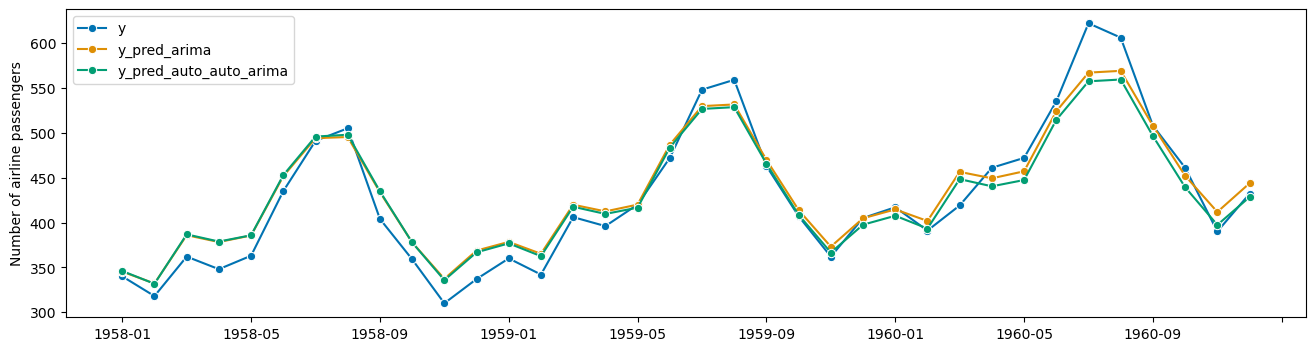

In [275]:
plot_series(y_test, y_pred_arima, y_pred_auto_arima, labels=["y", "y_pred_arima", "y_pred_auto_auto_arima"])

# Introduction to Exponential Smoothing and ETS Models

## Exponential Smoothing

Exponential smoothing is a family of forecasting methods that apply weighted averages of past observations to predict future values. The weights decrease exponentially as observations get older, hence the name. This approach is particularly effective for data with no clear trend or seasonal pattern.

### Simple Exponential Smoothing (SES)

Simple Exponential Smoothing is used when the time series is stationary, without trend or seasonality. The forecasts are calculated using weighted averages where the weights decrease exponentially:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $ \hat{y}_{t+1} $ is the forecast for the next period,
- $ y_t $ is the actual value at time $ t $,
- $ \hat{y}_t $ is the forecasted value at time $ t $,
- $ \alpha $ is the smoothing parameter, $ 0 \leq \alpha \leq 1 $.

### Holt's Linear Trend Method

Holt extended SES to allow forecasting data with a trend. This method has two equations: one for the level and one for the trend:

Level equation:
$$ \ell_t = \alpha y_t + (1 - \alpha)(\ell_{t-1} + b_{t-1}) $$

Trend equation:
$$ b_t = \beta^*(\ell_t - \ell_{t-1}) + (1 - \beta^*)b_{t-1} $$

Forecast equation:
$$ \hat{y}_{t+h} = \ell_t + hb_t $$

where:
- $ \ell_t $ is the level estimate at time $ t $,
- $ b_t $ is the trend estimate at time $ t $,
- $ \beta^* $ is the trend smoothing parameter.

### Holt-Winters Seasonal Method

The Holt-Winters method extends Holt's method to capture seasonality. It includes a seasonal component in addition to level and trend:

Seasonal equation:
$$ s_t = \gamma(y_t - \ell_{t-1} - b_{t-1}) + (1 - \gamma)s_{t-m} $$

where:
- $ s_t $ is the seasonal component at time $ t $,
- $ \gamma $ is the seasonal smoothing parameter,
- $ m $ is the length of the season.

## ETS (Exponential Smoothing State Space Model) Models

ETS models are a more formal statistical approach to exponential smoothing that explicitly models error, trend, and seasonal components.

### Description

ETS models categorize each component into additive or multiplicative, and each component can be present or absent. This leads to a variety of possible models, each suited to different kinds of time series data.

### ETS Model Components

The ETS model can be expressed in a state space form, allowing for a unified treatment of various exponential smoothing methods. Each model can be specified using a three-character string or acronym that represents the error, trend, and seasonal components, with each component being either:

- **A** (Additive)
- **M** (Multiplicative)
- **N** (None)

For example, an "ANN" model would have an Additive error, No trend, and No seasonality, while an "MAM" model would have a Multiplicative error, Additive trend, and Multiplicative seasonality.

### ETS Model Formulation

The general state space form of an ETS model can be written as:

$$ y_t = \text{Error}_t(\text{Trend}_t(\text{Seasonality}_t \circ d_t)) + \epsilon_t $$

where:
- $ y_t $ is the observed value at time $ t $,
- $ d_t $ is the demand (level) at time $ t $,
- $ \epsilon_t $ is the error term at time $ t $,
- $ \circ $ represents the operation defined by the model (addition or multiplication),
- The error, trend, and seasonality components are defined according to the selected ETS model.

For example, an ETS(A, A, A) model has additive error, trend, and seasonality components, while an ETS(M, A, M) model has multiplicative error and seasonality but an additive trend.

ETS models are fit to data using maximum likelihood estimation, and the chosen model can be used to produce point forecasts and prediction intervals.

## AutoETS

AutoETS refers to the automated selection and fitting of an Exponential Smoothing State Space Model (ETS). It is designed to identify the most appropriate error, trend, and seasonality (ETS) components of a time series without manual intervention.

### Description

AutoETS simplifies the model-building process by automatically determining the best-fitting ETS model from all possible combinations of error, trend, and seasonal components. This is particularly useful when the practitioner does not have a priori knowledge about which specific ETS model is most suitable for the data at hand.

The autoETS algorithm generally involves the following steps:

1. **Model Identification**: The algorithm evaluates various ETS models with different combinations of additive and multiplicative error, trend, and seasonal components.
   
2. **Model Selection**: It selects the best model based on a chosen information criterion, typically the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or Hannan-Quinn Information Criterion (HQIC).
   
3. **Parameter Estimation**: Once the model is selected, the algorithm estimates the smoothing parameters and initial states that best fit the historical data.
   
4. **Model Validation**: The fitted model can be assessed using diagnostic checks like residual analysis.

In [276]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [277]:
# Generate some example data
np.random.seed(0)
time = np.arange(100)
values = 20 + np.random.randn(100).cumsum()

In [278]:
data = pd.Series(values, index=time)

In [279]:
# Create a SimpleExpSmoothing model
model = SimpleExpSmoothing(data)

In [280]:
# Fit the model with smoothing_level alpha=0.2
fit_model = model.fit(smoothing_level=0.2, optimized=False)

In [281]:
# Forecast the next 10 steps ahead
forecast = fit_model.forecast(10)

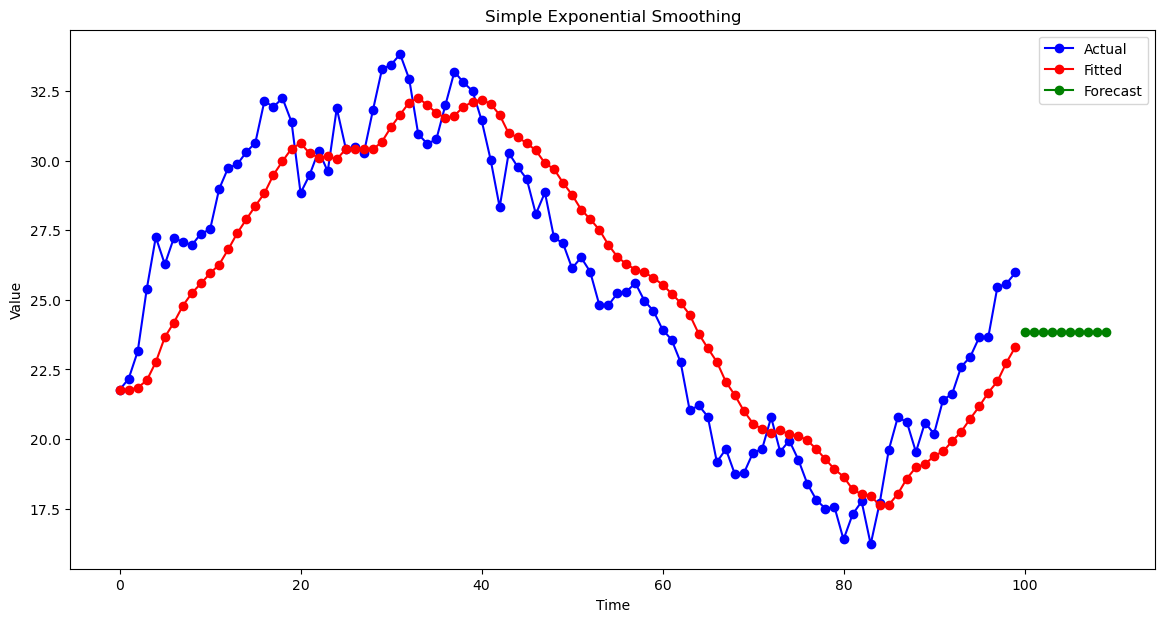

In [282]:
plt.figure(figsize=(14, 7))
plt.plot(data, marker='o', color='blue', label='Actual')
plt.plot(fit_model.fittedvalues, marker='o', color='red', label='Fitted')
plt.plot(np.arange(100, 110), forecast, marker='o', color='green', label='Forecast')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [283]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

In [284]:
# Initialize and fit the ETS model
ets_model = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp=12)
ets_model.fit(y_train)

ExponentialSmoothing(seasonal='multiplicative', sp=12, trend='additive')

In [285]:
y_pred_ets = ets_model.predict(fh=fh)

In [286]:
auto_ets_model = AutoETS(auto=True, sp=12, n_jobs=-1)
auto_ets_model.fit(y_train)

AutoETS(auto=True, n_jobs=-1, sp=12)

In [293]:
auto_ets_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ETS Results                                       
========================================================================================
Dep. Variable:     Number of airline passengers   No. Observations:                  108
Model:                                 ETS(MAM)   Log Likelihood                -365.090
Date:                          Mon, 15 Jan 2024   AIC                            766.180
Time:                                  20:23:16   BIC                            814.459
Sample:                              01-31-1949   HQIC                           785.756
                                   - 12-31-1957   Scale                            0.001
Covariance Type:                         approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7201      0.099      7.256      0.000       0.526       0.915
smoothing_trend      7.201e-05        nan        nan        nan         nan         nan
smoothing_seasonal   2.799e-05        nan        nan        nan         nan         nan
initial_level         110.9894        nan        nan        nan         nan         nan
initial_trend           1.8384        nan        nan        nan         nan         nan
initial_seasonal.0      0.9895        nan        nan        nan         nan         nan
initial_seasonal.1      0.8760        nan        nan        nan         nan         nan
initial_seasonal.2      1.0083        nan        nan        nan         nan         nan
initial_seasonal.3      1.1638        nan        nan        nan         nan         nan
initial_seasonal.4      1.3186        nan        nan        nan         nan         nan
initial_seasonal.5      1.3354        nan        nan        nan         nan         nan
initial_seasonal.6      1.2154        nan        nan        nan         nan         nan
initial_seasonal.7      1.0775        nan        nan        nan         nan         nan
initial_seasonal.8      1.0915        nan        nan        nan         nan         nan
initial_seasonal.9      1.1390        nan        nan        nan         nan         nan
initial_seasonal.10     0.9956        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       18.21   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.64   Prob(JB):                         0.22
Heteroskedasticity (H):               0.46   Skew:                            -0.40
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [290]:
# Forecast the next 36 months
y_pred_auto_ets = auto_ets_model.predict(fh=fh)

In [291]:
# Calculate sMAPE for each model
smape_ets = mean_absolute_percentage_error(y_test, y_pred_ets, symmetric=True)
smape_auto_ets = mean_absolute_percentage_error(y_test, y_pred_auto_ets, symmetric=True)

print(f'sMAPE (ETS): {smape_ets:.3f}')
print(f'sMAPE (AutoETS): {smape_auto_ets:.3f}')

sMAPE (ETS): 0.051
sMAPE (AutoETS): 0.063


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

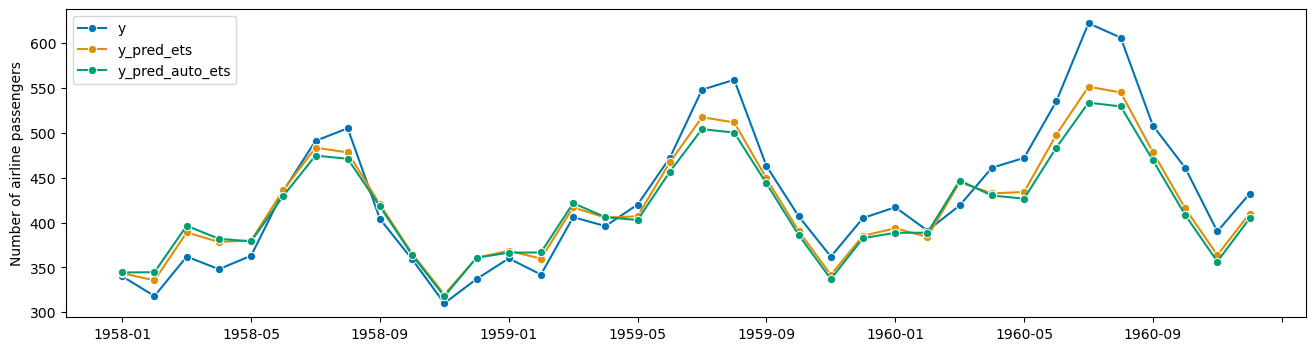

In [292]:
plot_series(y_test, y_pred_ets, y_pred_auto_ets, labels=["y", "y_pred_ets", "y_pred_auto_ets"])